In [1]:
import random 
import numpy as np
import pandas as pd
from numpy import random
import os, sys
import matplotlib.pyplot as plt


## Creating synthetic  time-series data

In [2]:
# Predefined paramters for 3 order of AR(3)
random.seed(101) # utils to  generate the same random numbers
ar_n = 3                     # Order of the AR(n) data
ar_coeff = [0.7, -0.3, -0.1] # make a random  Coefficients b_3, b_2, b_1
noise_level = 0.1            # Noise added to the AR(n) data
length = 20000               # Number of data points to generate
 
# Random initial values
#ar_data1 = list(np.random.randn(ar_n))
data_list = []
# generate 30 time-series of data
for j in range(30):
    ar_data = list(np.random.randn(ar_n))   
    for i in range(length - ar_n):            
        next_val = (np.array(ar_coeff) @ np.array(ar_data[-3:])) + np.random.randn() * noise_level
        ar_data.append(next_val)
    data_list.append(ar_data)

# create dataframe from a list of the generated series
raw_data = pd.DataFrame(data_list)
# set the indices
idx_list = pd.date_range(end='2022-05-01', periods = 20000, freq= 'D')
raw_data  = raw_data.T
raw_data['Date'] = idx_list
raw_data.set_index(['Date'], inplace= True)
raw_data = raw_data.T
# Save the generated data csv file.
raw_data.to_csv('syntetic_data.csv', index=False, header=None)

#Data loading
df = pd.read_csv('syntetic_data.csv',header = None , index_col=False)
#print(df.shape)
#df.head()


# plt.show()
#df.shape
#df = np.transpose(df)
print('Number of features or sensors {}'.format(df.shape[0]))
print('Number of observations {}'.format(df.shape[1]))

Number of features or sensors 30
Number of observations 20000


In [3]:
df = np.transpose(df)
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,2.706850,-0.039353,-0.993348,-0.878315,0.729800,1.772483,-0.135503,-0.092481,-1.269383,-1.369851,...,0.983923,-0.490918,-1.076567,1.117716,0.630803,1.921617,0.081659,0.101576,-0.628400,1.241834
1,0.628133,0.312879,1.110086,-0.580520,1.099140,-1.352316,0.704121,0.351775,-1.131757,0.546384,...,0.666493,-1.169645,-0.965551,0.048223,2.031999,-0.565429,-1.211029,-1.061720,-1.033558,1.817479
2,0.907969,-0.613249,-0.772144,0.655769,-0.815405,-1.924031,-0.300981,1.023021,-0.589555,-0.427475,...,0.453132,-0.826087,0.534482,0.587310,2.265362,1.737457,2.154907,-1.558781,-0.765165,-0.823463
3,1.665941,-0.151914,-0.851147,-0.407693,0.305578,1.877865,-0.345735,-0.268038,-0.439019,-1.005656,...,0.166325,-0.029824,-0.530168,0.748784,-0.413520,1.218776,0.312339,0.326318,-0.010038,0.339121
4,0.065820,0.364539,1.104375,-0.574503,0.909275,-0.540026,0.669532,0.011110,-0.541374,0.557354,...,0.297196,-0.480272,-0.683416,-0.222914,0.775753,-0.909432,-1.332692,-0.355153,-0.696641,1.530878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.241937,-0.072554,0.215660,0.190091,-0.447041,0.386242,-0.233793,0.064552,-0.255393,-0.007808,...,0.078017,-0.063372,-0.306885,0.187108,0.243265,-0.069699,-0.105558,0.119130,0.342596,-0.165461
19996,-0.137082,-0.351972,-0.147480,0.065141,-0.179392,0.012753,-0.081811,0.330050,0.429653,0.039888,...,-0.475638,0.234298,0.214448,-0.152562,-0.123244,-0.105369,0.058217,-0.188639,-0.054414,0.185479
19997,0.326699,0.181769,-0.287878,0.002210,0.438759,-0.341237,0.104971,-0.320130,-0.043894,0.084602,...,0.497333,-0.114647,0.250367,0.003943,0.019739,-0.020449,0.162673,0.181025,-0.151642,0.051536
19998,0.046307,0.021613,0.169813,0.046229,-0.302782,0.462034,-0.297517,0.059603,-0.289153,0.059065,...,-0.002424,-0.274412,-0.313129,0.347127,0.099955,-0.202041,-0.092495,0.226139,0.408205,-0.213075


## The first few  series

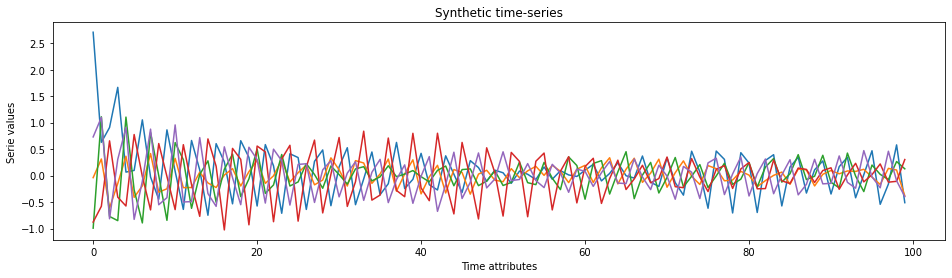

In [4]:
plt.figure(figsize=(16,4))
plt.plot(df.iloc[:100,:5])
plt.title('Synthetic time-series')
plt.xlabel('Time attributes')
plt.ylabel('Serie values')
plt.legend
plt.show()

## Anomaly injection function

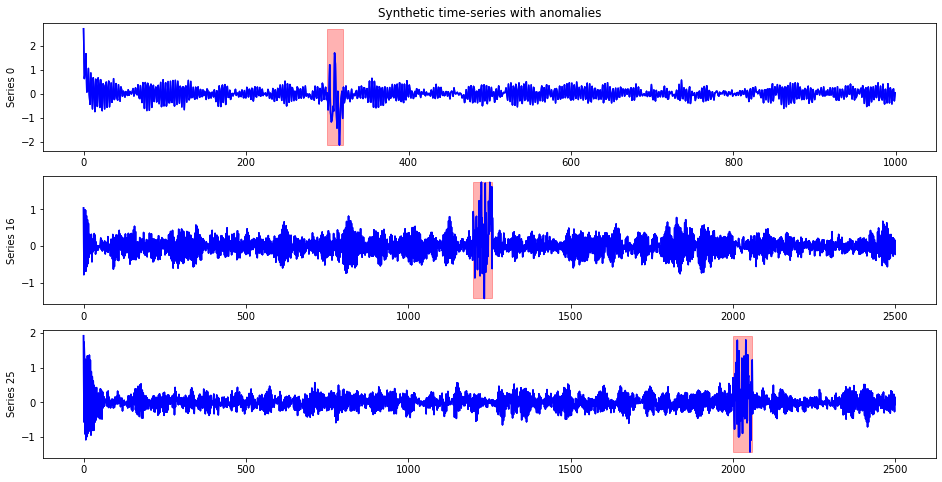

In [5]:
#Creates a random anomaly with different duration
def inject_anomaly(data, start_index=100,  duration=60, series_num=0):
    base_value = data.iloc[start_index, series_num]
    data.iloc[start_index:start_index + duration, series_num] = base_value \
    +  np.random.normal(loc=0, scale=0.8, size=duration)
# Injecting anomaly in root 0, 16 and 25
start_idx_list = [300, 1200, 2000]
periods_list = [20, 60, 60]
sensor_list = [0, 16, 25]
for start_idx, period, sensor in zip(start_idx_list, periods_list, sensor_list):
    inject_anomaly(df, start_idx, period, sensor)
    
# Plot anomaly in root 0 (variable 0)
fig, ax = plt.subplots(3,1, figsize=(16,8))
ax[0].set_title('Synthetic time-series with anomalies')
ax[0].plot(df.iloc[0:1000,0], color='blue')
ax[0].fill_between(np.arange(300,300+20), y1=min(df.iloc[:,0]), y2=max(df.iloc[:,0]), color='red', alpha=0.3)
ax[0].plot(df.iloc[0:1000,0], color='blue')
ax[0].set_ylabel('Series 0')
# Plot anomaly in root 16 (variable 16)
ax[1].plot(df.iloc[0:2500,16], color='blue')
ax[1].fill_between(np.arange(1200,1200+60), y1=min(df.iloc[:,16]), y2=max(df.iloc[:,16]), color='red', alpha=0.3)
ax[1].plot(df.iloc[0:2500,16], color='blue')
ax[1].set_ylabel('Series 16')

# # Plot anomaly in root 25 (variable 25)
ax[2].plot(df.iloc[0:2500,25], color='blue')
ax[2].fill_between(np.arange(2000,2000+60), y1=min(df.iloc[:,25]), y2=max(df.iloc[:,25]), color='red', alpha=0.3)
ax[2].plot(df.iloc[0:2500,25], color='blue')
ax[2].set_ylabel('Series 25')
plt.show()

In [ ]:
df

## Reindexing time-series

In [ ]:
idx_list = pd.date_range(end='2022-05-01', periods = 20000, freq= 'D')
idx_list

df['Date'] = idx_list
df.index

In [ ]:
df.set_index(['Date'], inplace= True)
df.T

In [ ]:
df.values

## Saving data to csv file format

In [ ]:
df = pd.DataFrame(data_list)
df.to_csv('synthetic_data.csv', index=None, header=None)